<center><h1>K-Means Distributed Clustering  avec MapReduce  et Hadoop</h1></center>

## __Démo Video__ : https://youtu.be/jvmfOnJzsXk
<br>
__Auteurs__ : SOUDANI Jawher , FERJANI Ahmed
<br>
__Copyright__ : Big Data Frameworks

![alt text](https://scontent-cdg2-1.xx.fbcdn.net/v/t34.0-12/25359995_270997116758890_54276442_n.png?oh=77e3dd030e8ae940a7c8b56129e9ee44&oe=5A34113A)

## Introduction

Avec le développement technologique, les volumes de données traitées par de nombreuses applications dépassent régulièrement le seuil de péta-byte, ce qui à son tour fait augmenter les exigences de calcul. <br>
Des algorithmes efficaces de parallel clustering sont la clé pour répondre à l'évolutivité (scalability) et les exigences de performance inhérentes à ces analyses de données scientifiques. <br>
Jusqu'à présent, plusieurs algorithmes de parallel clustering ont été proposés mais ils présentent les inconvénients suivants: <br>
 - Ils supposent que tous les objets peuvent résider dans la mémoire principale en même temps.
 - ces systèmesp roposent des modèles de programmation qui utilisent des restrictions pour paralléliser le calcul automatiquement.
 
 
Ces deux hypothèses ne sont pas adéquates pour un grand jeu de données c'est pourquoi il est nécessaire de développer des algorithmes de parallel clustering.<br>
MapReduce est un modèle de programmation avec une implémentation associée pour gérer et traiter de grands volumes de données efficacement ce qui convient parfaitement aux tâches réelles. <br>
Dans ce rapport, nous adaptons l'algorithme k-means dans le framework MapReduce qui est implémenté par Hadoop pour rendre la méthode de clustering applicable à données à grande échelle.


## 1. L' algorithme de Kmeans

L'algorithme K-means est la méthode de  clustering la plus connue et la plus utilisée. Elle prend comme paramètre d'entrée, k (le nombre de clusters), et partitionne un ensemble de n objets dans k clusters de sorte que la similarité intra-cluster résultant est élevé alors que la similarité inter-cluster  est faible. <br>
La similarité entre clusters est mesurée en fonction de la valeur moyenne des objets dans le cluster, qui peut être considéré comme le "centre du gravité " du cluster ou médoïde. <br>
L'algorithme procède comme suit: 
- Premièrement, il sélectionne aléatoirement k objets parmi tous les objets. Ces points sélectionnés représentent les centres initiaux des clusters.
- Chacun des points restants est affecté au cluster auquel il est le plus similaire, en fonction de la distance entre le point et le centre du cluster. (par exemple, si on utilise la distance euclidienne comme mesure de similarité, on doit affecter le point au cluster dont la distance entre ce point et le centre de cluster est minimale.)
- Finalement, on met à jour le nouveau centroïde.  Ce processus réitère jusqu'à ce que la fonction de perte converge (erreur minimale ou pas de changement des centroïdes par rapport à l'étape précédente.).

### ***Pseudo Code de K_means:***
Supposons qu'on a un ensmeble d'apprentissage: $x^{(1)}, ..., x^{(m)}$, on voulait grouper ces données des quelques clusters "cohérents". L'objectif est de prédire k-centroïdes et un label $c^{(i)}$ pour chaque point (ce n'est pas de la classification supervisée mais $x^{(i)}$ mesure l'appartenance d'un point i à l'un des clusters). <br>

**1. initialiser les centroïdes $\mu_1, \mu_2,..., \mu_k ~ \in \mathbb{R}^n$ ** <br>
**2. Répéter jusqu'à convergence : { ** <br>



> pour chaque i, $c^{(i)} = \underset{j}{\operatorname{argmin}} ||x^{(i)} - \mu_j ||^2 $


> pour chaque j,  $\mu_j = \frac{\sum_{i=1}^m \mathbb{1}\{c^{(i)} =j\}x^{(i)}}{\sum_{i=1}^m \mathbb{1}\{c^{(i)} =j\}}$

> **}**



### Complexité de k_means:

Dans l'algorithme de k-means, le calcul le plus couteux est le calcul des distances. A chaque itération, il faudrait un total de (mk) calcul de distances où m est le nombre de points et k est le nombre de clusters. <br>
Il est évident que les calculs de distances entre un point et les centroïdes n'a pas de  rapport avec les calculs de distancse entre les autres point avec les centroïdes correspondants. Par conséquent, les calculs de distances entre différents points avec des centroïdes peuvent être exécutés en parallèle. <br>
Dans chaque itération, les nouveaux centroïdes, qui sont utilisés pour de la prochaine itération, devraient être mis à jour. Par conséquent **les procédures itératives** doivent être exécutées **en série**.

bla bla bla We do understand that not all customers are alike and have the same taste. So, this leads to the challenge of marketing the right product to the right customer. An offer or product which might entice a particular customer segment may not be very helpful to other segments. So, you can apply k-means clustering algorithm to segment your entire customer audience into groups with similar traits and preferences based on various metrics (such as their activities, likes and dislikes on social media and their purchase history). Based on these customer segments identified, you can create personalized marketing strategies and bring more business to your organisation. 

## Simultaion : 

### Generation des données pour le clustering

### code source

In [115]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets.samples_generator import make_blobs


class Générateur(object):
 
    def générateurData(self,num, outputFile):
    
        """cette fonction permet de générer n'importe quel nombre de points
         pour la mise en cluster en utilisant deux arguments , la génération
         des points ce faits suivant la loi normale avec une moyenne 
         representé par les centres et un ecart type de 3,9 et dimension =2
         pour pouvoir les visualiser clairement.
         tous ces parametres peuvent êtres changés selon le nos préférences
         mais dans notre cas on va utiliser cette fonction pour tester notre
         algorithme
         Parametres : 
         num: le nombre de points qu'on veut générer 
         outputFile: le fichier de sortie dans lequel on va enregistrer
                     les points
        """
      
        #Les vrais centres des clusters
        centers = [[-30, -30], [-10, -10], [-1, -1], [10, 10], [30, 30]]
        
        #Générer des blobs gaussiens isotropes pour le clustering.
        X, labels = make_blobs(n_samples=num,
                                    centers=centers, cluster_std=3.9,
                                    n_features=2)
        
        #enregistrer des points sur l'image pour faciliter la manipulation
        df = pd.DataFrame(X)
        
        #enregistrer des points dans le fichier de sortie de notre  
        #programme mapreduce
        df.to_csv(outputFile, header=False, index=False, sep=" ")

        #tracer les points avec des couleurs différentes selon chaque centre \
        #pour pouvoir le comparer plus tard au clustering de notre programme
        
        plt.figure(figsize=(9,8))
        plt.scatter(X[:, 0], X[:, 1], c=labels)
        plt.show()
        return X, labels
    

### generation des données 

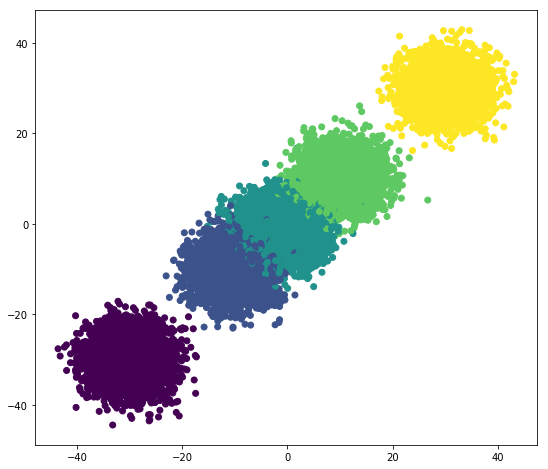

In [116]:
#Dans notre cas on va générer 20,000 point vu qu'on va effectuer le test 
#sûrmenet d'une maniere distribuée mais sur notre machine locale donc il 
#faut pas exagérer 
 
generator_instance =Générateur()
X,labels=generator_instance.générateurData(20000,'input_file.txt')

#ci-dissous le vrai schéma des points générés

In [ ]:
import numpy as np
import sys
import pylab as plt
import numpy as np
import random
%matplotlib inline  

class Our_Kmeans():
  
    """cet algorithme de k-means  permet un clustering  pour grouper 
       les points qui ont traits et des préférences similaires en se 
       basant sur la distance euclidienne et la 2ème norme et puis 
       il trace le resultat de clustering avec des points sous forme
       d'etoile qui représente les centres trouvés après la dernire
       itération
    """
    
    centroids=[]
    data=[]
    
    
    def GetData(self,file):
        """importer les données qui sont supposées être en dimesion 
           2 pouvoir les visualiser , si non l'algorithme fonctionne 
           avec n'importe quelle dimension
        """
        data=pd.read_csv(file, header=None, names=["x1", "x2"], sep=" ")
        return data.values
    
    
    def __init__(self,file):
        """ initier les données dans la classe (l'objet)
        """
        self.data=self.GetData(file)
    
    
    def GetCentroids(self,k):
        """ choisir k centre aléatoirement pour initier l'algorithme
        """
        initial_centroids = random.sample(list(self.data),k)
        initial_centroids=[lst.tolist() for lst in initial_centroids]
        initial_centroids.sort()
        return initial_centroids
    
    
    def distance_vector(self,v1,v2):
        """cette fonction permet de calculer la distance entre deux point
           quelques soit leur dimension
        """
        diff=[d1 - c2 for d1,c2 in zip(v1,v2)]
        return np.linalg.norm(diff)
    
    
    def diff(self,k,centroids1,centroids2):
        """cette fonction permet de trouver la distance maximale entre
           deux centroides parmi les paires des centroides dans les deux
           vecteur , elle sera utilisé pour le test d'arrêt de l'algo
           cad si la distance maximale ( qui est le pire cas) est infé-
           rieur à un seuil , on arrête les itérations
        """
        max_distance = 0.0
        for i in range(k):
            dist = self.distance_vector(centroids1[i],centroids2[i])
            if dist > max_distance:
                max_distance = dist

        return max_distance
        
        
    def show(self,X, C, centroids, keep = False):
        """cette fonction permet des visualiser le résultat finale ainsi
        que les centres trouvés
        """
        plt.figure(figsize=(9,8))
        plt.scatter(X[:, 0], X[:, 1], c=C)        
        plt.plot(centroids[:,0],centroids[:,1],'*m',markersize=20)
        
        
    def kMeans(self,K, plot_progress):
        """ cette fonction est le core de notre algorithme, c'est elle qui
        fait le calcul des centroides et les points les plus proches de 
        chaque centroide pour former les groupes
        """
        self.centroids = self.GetCentroids(K)
        while True:
            # Etape d'affectation de cluster
            C = np.array([np.argmin([np.dot(x_i-y_k, x_i-y_k) for y_k in \
                                     self.centroids]) for x_i in X])
            # Déplacer les centroïdes
            newcentroids = [X[C == k].mean(axis = 0) for k in range(K)]
            if self.diff(K,self.centroids,newcentroids)<0.1:
                break
            else:
                self.centroids=newcentroids
            # Tracer les points et les centres
        if plot_progress==1 : self.show(self.data, C, np.array\
                                        (self.centroids))
        return np.array(self.centroids) , C

### Résultat de clustering avec le kmeans non distribué 

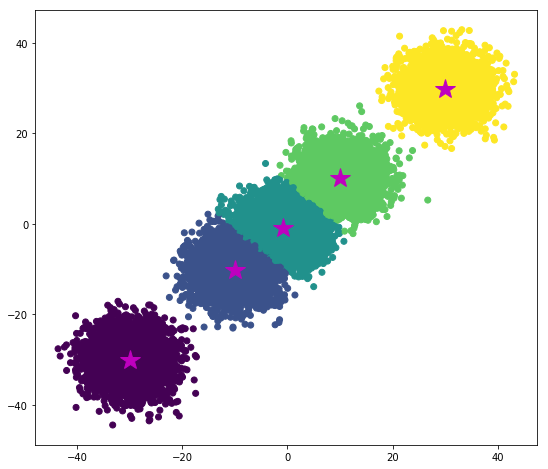

In [117]:
kr=Our_Kmeans('input_file.txt')
X,c=kr.kMeans(K = 5, plot_progress = 1)

l'algorithme a réussi à trouver les bon centres qui permettent le bon clustering et le résultat est proche de celui tracé avec les vrais clusters

### Evaluation de l'agorithme non distribué 

In [118]:
def Score(guess, solution):
    n = 0
    for l,c in zip(guess,solution):
        if l==c:
            n+=1
    return n

In [119]:
Acc=Score(labels,c)/len(labels)*100 

In [120]:
print("accuracy of the algorithme is : ",Acc, "%")

accuracy of the algorithme is :  97.38 %


accuracy peut être differente selon le choix aléatoire des centroides initiales

# 2.Le kmeans distribué

Comme décrit dans la partie précédente , l'algorithme de KMeans distribué nécessite un job MapReduce.
La fonction map exécute la procédure d'assignation de chaque échantillon au plus proche
centroïde, tandis que la fonction reduce effectue la procédure de mise à jour des nouveaux centroïdes. <br>
Afin de réduire le coût de transfert via le réseau, une fonction combiner est developpée pour traiter le résultat des valeurs intermédiaires avec la même clé pour chaque mapper. <br>
<h4> La fonction Map </h4>

Pour la fonction Map, l'ensemble des données d'entrée est stocké en tant que fichier de séquence des paires <key, value>, chacune représentant un point dans l'ensemble des données. la clé est l'offset en octets de cette entrée par rapport au point de départ du fichier, et la valeur est les coordonnées de l'entreé. <br>
L'ensemble des données est divisé et globalement diffusé à tous les mappers. Par conséquent, les calculs de distance peuvent s'exécuter d'une façon parallèle. <br>
Pour chaque mapper, le kmeans distribué utilise au début des centroïdes qui sont fixés aléatoirement sauvegardés comme des variables globales. Compte tenu de ces informations, le mapper peut calculer le centroïde le plus proche pour chaque point. Ainsi les valeurs intermédiaires sont composées de deux parties: le numéro du cluster( qui minimise la distance entre le centroïde et le point considéré) et les coordonnées du point. <br>
<h4> La fonction Combiner </h4>
Après chaque tâche de map, nous appliquons la fonction combiner pour combiner les données intermédaires issues d'un même mapper. Puisque ces données intermédiares sont stockées sur le disque local de l'hôte, le coût de transfert sur réseau est nul. <br>
Dans la fonction combine, nous additionons partiellement les valeurs assignés au même cluster. (Remarque:un compbiner peut être utilisé ici car la fonction somme est commutative et associative qui n'est pas le cas pour la fonction moyenne).
Afin de calculer la moyenne des points dans le même cluster, nous devons garder trace du nombre d'échantillons dans le même cluster pour chaque mapper.<br>
<h4> La fonction Reduce </h4>
L'entrée de la fonction reducer est  les données obtenues à partir la fonction combine (après shuffling and sorting).
Comme décrit ci-dessus, les données du combiner comprennent une somme partielle des points dans le même cluster et le nombre d'échantillons de ce cluster. <br>
Dans la fonction de réduction, nous pouvons additionner tous les points et calculer le nombre total de points pour chaque cluster. Par conséquent, on peut obtenir les nouveaux centroïdes qui vont être utilisés dans la prochaine itération.

### la classe Map_Red_Kmeans : 
la classe mapreduce_kmeans calcule les centroïdes à utiliser pour faire le clustering final en utilisant mapreduce mrjob qui peut être exécuté localement ou sur hadoop ou sur emr


In [ ]:
import sys
import re
import numpy as np
import mrjob
from mrjob.job import MRJob
import math



class Map_Red_Kmeans(MRJob):
  
    """ la classe mapreduce_kmeans calcule les centroïdes à utiliser pour 
        la dernière itération de la carte en utilisant mapreduce mrjob
        qui peut être exécuté localement ou sur hadoop ou sur emr
    """

    SORT_VALUES = True
    OUTPUT_PROTOCOL = mrjob.protocol.RawProtocol
    
    
    def distance_vec(self,d,c):
      
        """calcule la distance entre deux vecteurs (en n'importe quelles
           dimensions) 
           np.linalg.norm (point de données - centroïde)
        """
        
        diff=[d1 - c2 for d1,c2 in zip(d,c)]
        return np.linalg.norm(diff)
 
    def configure_args(self):
        super(Map_Red_Kmeans, self).configure_args()
      
        #les deux méthodes add_passthru_arg et add_file_arg permet 
        #d'ajouter des options autre que le fichier d'entrée et de  
        #sortie dans les lignes de commandes
        
        #ajouter le nombre de cluster après l'argument --k
        self.add_passthru_arg("--k",  default=4, help="Number of clusters.")
        #ajoute le fichier qui contient les centroides après l'argument --c
        self.add_file_arg('--c')

    def file_to_centroids(self):
      
    #récupère les centoids du fichier (self.option.c) 
    #et les transforme en liste
    
        f = open(self.options.c,'r')
        output_data=f.read().split('\n')
        centroids=[]
        
        #elimier les caracters spéciaux et retourner une liste contenant
        #les centroides
        #on passer par cette étape car le résultat final des centroides
        #retourner par cet algorithme dans le fichier texte est sous cette
        #forme [,,] [,,] ...
        
        for line in output_data:
            if line:
                newline = re.search("\[(.*?)\]", line)
                newline = newline.group()
                newline = newline.replace("[", "").replace("]", "")
                newline.strip()
                k,x,y = newline.split(',')
                centroids.append([float(k),float(x),float(y)])
        f.close()
        return centroids
 
    def mapper(self, _, lines):
        
        """ la fonction map , cette fonction calcule la distance entre
            chaque points et les centroides et atrribue un classe à chaque
            point en se basant sur la distance
            les centroides utiliser au debut sont générer aléatoirement mais
            aprés, l'algorithme va retourner des centroides et les 
            réutiliser chaque fois pour les améliorer
        """
       
        centroids = self.file_to_centroids()
        for l in lines.split('\n'):
            x,y = l.split(' ')
            p = [float(x),float(y)]
            min_dist=math.inf
            classe = 0
            
            # nous itérons à traver les centroïdes, nous avons k centroïdes 
            #(nous obtenons le nombre de centroïdes de l'argument k en ligne
            #de commande)
            #on calcule la distance entre les centroides et les points
            for i in range(int(self.options.k)):
                dist = self.distance_vec(p,centroids[i][1:])

            #on cherche la distance minimale chaque fois qu'on veut attribué
            #un point à un cluster (centroide)
            
                if dist < min_dist:
                    min_dist = dist
                    classe = centroids[i][0]
            
        yield classe, p
 
    def combiner(self,k,data_points):
    
        """calculer une somme partielle des points suivi d'un coefficient
           avant de calculer la moyenne finale vu que nous ne pouvons pas 
           calculer la moyenne ici ( la moyenne des moyennes de la somme 
           est différente de la moyenne de la somme )
           on peux procéder par attribuer des coefficients au moyennes
           partielles mais cela ne changera pas la complexité de l'algorithme
           par rapport au calcul de la somme partielle
           les deux methodes permettent de minimiser les flux entre le phase
           de mapping et reducing
        """
      
        first_sum_points = next(data_points)
        first_counter = 1
        for data_point in data_points:
            first_sum_points=[sum(x) for x in zip(first_sum_points\
                                                  ,data_point)]
            first_counter += 1
        yield k, (first_sum_points, first_counter)
    
    
    def reducer(self, cluster, v):   
        """ la fonction reducer permet de calculer la moyenne totale des
            points qui appartiennent au même custer
            ces moyennes représentent les nouveaux centres qui seront
            enregister dans le fichier des centroides et utiliser pour 
            l'itération suivante jusqu'au trouver les centres finals
            
            paramètres : 
            cluster :  classe 
            v :  première somme partielle des points liés à la classe 
            suivi de son compteur (la somme retourné par le combiner)
        """

        final_sum,final_counter=next(v)
        for partial_sum, first_counter in v:
            final_sum =[sum(x) for x in zip(final_sum,partial_sum)]
            final_counter += first_counter
        yield str(cluster) ,str([x / final_counter for x in final_sum])
 
 #cette classe permet juste de lancer mapreduce mais pour une seule itération

  
if __name__ == '__main__':
  
#ceci pour tester la classe indépendament des autres classe
    args = sys.argv[1:]
    mr_job=Map_Red_Kmeans(args=[args[0],'--c',args[1],'--k',args[2]])
 
    with mr_job.make_runner() as runner:
        runner.run()
        for key, value in mr_job.parse_output(runner.cat_output()):
            print(key+','+value)

### la classe MRFinalKMeans
c'est elle qui va attribué une classe à chaque point pour le clustering final en se basant sur le resultat retourné par Map_Red_Kmeans aprés plusieurs itération


In [ ]:
import sys
import re
import numpy as np
import mrjob
from mrjob.job import MRJob
import math



class MRFinalKMeans(MRJob):
    
    """ MRFinalKMeans permet tout simplement d'attribué une classe à chaque
        point en se basant sur les centroides retournés par la classe 
        précedantes aprés plusieurs itérations
        cette classe ne contient qu'un seul mapper sans reducer
    """

    SORT_VALUES = True
    OUTPUT_PROTOCOL = mrjob.protocol.RawProtocol
    
    def distance_vec(self,d,c):
      
         """calcule la distance entre deux vecteurs (en n'importe quelles
           dimensions) 
           np.linalg.norm (point de données - centroïde)
        """
        
        diff=[d1 - c2 for d1,c2 in zip(d,c)]
        return np.linalg.norm(diff)
 

    def configure_args(self):
  
        """ la même configuration précedantes"""
    
        super(MRFinalKMeans, self).configure_args()
      
        #ajouter le nombre de cluster après l'argument --k
        self.add_passthru_arg("--k",  default=4, help="Number of clusters.")

        #ajoute le fichier centroide après l'argument --c
        self.add_file_arg('--c')

    def file_to_centroids(self):
      
      """ la même fonction précédante pour le traitement de fichier 
          contenant les centroides
      """
      
        f = open(self.options.c,'r')
        output_data=f.read().split('\n')
        centroids=[]
        for line in output_data:
            if line:
                newline = re.search("\[(.*?)\]", line)
                newline = newline.group()
                newline = newline.replace("[", "").replace("]", "")
                newline.strip()
                k,x,y = newline.split(',')
                centroids.append([float(k),float(x),float(y)])
        f.close()
        return centroids
 
    def mapper(self, _, lines):
       
        centroids = self.file_to_centroids()
        for l in lines.split('\n'):
            x,y = l.split(' ')
            p = [float(x),float(y)]
            min_dist=math.inf
            classe = 0
            
            # nous itérons à traver les centroïdes, nous avons k centroïdes 
            #(nous obtenons le nombre de centroïdes de l'argument k en ligne
            #de commande)
            #on calcule la distance entre les centroides et les points                          
            for i in range(int(self.options.k)):
                dist = self.distance_vec(p,centroids[i][1:])
                
            #on cherche la distance minimale chaque fois qu'on veut attribuer
            #un point à un cluster (centroide)
                if dist < min_dist:
                    min_dist = dist
                    classe = centroids[i][0]
            
        yield str(classe), str(p)
 

 # cette fonction sera lancé une seule fois à la fin des itérations de la 
#phase map reduce qui retourne les centroides cherchés

 
if __name__ == '__main__':
#ceci pour tester la classe indépendament des autres classe
    args = sys.argv[1:]
    mr_job=MRFinalKMeans(args=[args[0],'--c',args[1],'--k',args[2]])
 
    with mr_job.make_runner() as runner:
        runner.run()
        for key, value in mr_job.parse_output(runner.cat_output()):
            print(key+','+value)

### Main script
ce script permet d'itérer les mappeurs et réduceurs de sorte que nous obtenons à chaque itération des nouveaux centroïdes, nous répétons jusqu'à ce que les centroïdes ne changent pas

In [ ]:
import numpy as np
from mrjob.util import to_lines
from mrjob.job import MRJob
from finalmapper import MRFinalKMeans
from math import sqrt
from kmeans import Map_Red_Kmeans
import sys
import os.path
import shutil
import re


#le fichier contenant les premiers centroides qui sont choisis aléatoirement
input_centroids = "/home/djo/centroids.txt"

#le fichier qui va sauvegarder les centroides à chaque itération pour 
#qu'elles seront utilisées dans les itérations d'aprés comme fichier
#d'entrée
temp_centroids_file="/tmp/centroids.txt"


def get_centroids(job, runner):
  
    """ obtenir le centroïde de sortie du mrjob (affichés depuis le terminal) 
        et les enregister dans une matrice grace à runner.cat_output
    """
    c = []
    for key, value in job.parse_output(runner.cat_output()):    
        value=value[:1]+key+','+value[1:]       
        c.append(value)
    return c

  
  
def get_first_c(fname):
  
    """ obtenir les premiers centroïdes à partir de du fichier d'entrée 
        et non pas à partir de la sortie de mrjob comme la fonction 
        précedante 
    """
    f = open(fname,'r')
    centroids=[]
    for line in f.read().split('\n'):
        if line:
                newline = re.search("\[(.*?)\]", line)
                newline = newline.group()
                newline = newline.replace("[", "").replace("]", "")
                newline.strip()
                k,x,y = newline.split(',')
                centroids.append([float(k),float(x),float(y)])
    f.close()
    return centroids



def distance_vec(d,centroid):
        """calcule la distance entre deux vecteurs (en n'importe quelles
           dimensions) 
           np.linalg.norm (point de données - centroïde)
        """
        diff=[d1 - c2 for d1,c2 in zip(d,centroid)]
        return np.linalg.norm(diff)

      
def diff(k,centroids1,centroids2):
    """calculer la distance entre les anciens centroïdes et les nouveaux
       centroïdes pour savoir si ils sont changés ou non , si oui on continue
       , si non on sort de la boucle de l'iteration.
    """
    max_distance = 0.0
    for i in range(k):
        dist = distance_vec(centroids1[i],centroids2[i])

        if dist > max_distance:
            max_distance = dist
            
    #la fonction retourne seulement la distance maximale entre les paires
    #des centroides , si cette distance est minime ou nulle, cela implique 
    #que les autres distances le sont aussi donc les centroîdes ne changent
    #plus donc on arrête la boucle.
    
    return max_distance


  
def write_centroids(centroids):
    
    """cette fonction permet d'écrire les centroïdes trouvés à chaque 
       itération dans le fichier temporaire  pour les tester avec la fonction 
       diff et les utiliser comme centroïdes initiaux pour l'itération 
       suivantes
    """  
    f = open(temp_centroids_file, "w")
    centroids.sort()
    for c in centroids:
        f.write(c)
    f.close()


    #la main script qui va assurer l'itération d'une manière distribuée
if __name__ == '__main__':
  
    #importer les arguments depuis la ligne de commande
    args = sys.argv[1:]
  
    #copier le ficher des centroides initiaux qui sont choisis aléatoirement
    #dans le répertoire temporaire  qui sera utilisé pour sauvegarder les 
    #centroides de chaques itération
    shutil.copy(input_centroids,temp_centroids_file)
    
    #récupérer les centroides initiaux pour initier l'algorithme
    old_centroids = get_first_c(input_centroids)

    
    #la boucle des itérations pour chercher les centroides
    while True:
        
        #instancier la classe Map_Red_Kmeans avec les arguments de la ligne 
        #de commande (nombre de clusters et le fichier d'entré)
        #le fichier temporaire est par defaut dans temp_centroids_file donc
        #il suffit d'entrer deux arguments : 
        #args[0] : les points générés au debut 
        #args[1] : le nombre de cluster souhaités
        mr_job=Map_Red_Kmeans(args=[args[0],'--c',temp_centroids_file,'--k'\
                                    ,args[1]])
 

        with mr_job.make_runner() as runner:
            #exécuter le mar reduce job qui permet chercher les centroides
            runner.run()
        
            #mettre le resultat retourné par le mrjob (les centroides) dans 
            #une matrice
            centroids = get_centroids(mr_job,runner)
        
        #écrire les centroides trouvés dans le fichier temporaire pour
        #pouvoir les utiliser dans l'itération suivante
        
        write_centroids(centroids)
        #récupérer les centroides depuis le fichiers temporaire 
        new_centroids = get_first_c(temp_centroids_file)
        
        #comparer les centroides retournés par le mrjob avec les 
        #anciens centroîdes
        max_d = diff(int(args[1]),new_centroids,old_centroids)
        
        #si la distance est négligebale ou nulle , on peut assumer que 
        #les centroides ne changent plus et donc on sort de la boucle
        #si non on remplaces les centroîdes précédants par les 
        #nouveaux centroîdes et on répète la même itération mais avec la 
        #nouvelle entrée
        if max_d < 0.001:
            break
        else:
            old_centroids = new_centroids

    #aprés qu'on sort de la boucle , on attribue chaque point à sa classe( à 
    #son centroîde le plus proche) par un autre map reduce job
    mr_job=MRFinalKMeans(args=[args[0],'--c',temp_centroids_file,'--k',\
                               args[1]])
 
    with mr_job.make_runner() as runner:
        runner.run()
    #afficher les résultat finals contenant et les écrire  dans 
    #un fichier (le ficiher sera mentionné dans la ligne de commande)
    #chaque point avec sa classe
        for key, value in mr_job.parse_output(runner.cat_output()):
            print(key+','+value)


Pour cet exemple il nous a fallu 9 itérations pour arriver aux centroïdes finaux

### Visualisation du résultat final

In [121]:
# en utilisant pandas , on transforme le fichier trouvé txt retourné par 
# le mrjob final en dataframe contenant trois colonnes:
# 1ere colonne est celle du cluster (ou bien la classe)
# 2eme colonne est celle du composant x du point
# 3eme colonne est celle du composant y du point 
# vu qu'on a utilisé des points en deux dimensions pour faciliter la visua-
#lisation des données , si non notre algorithme peut fonctionner avec n'im-
#porte quelle dimension
df=pd.read_csv("text.txt",header=None)
df.columns=["cluster","x","y"]
df["x"]=df["x"].apply(lambda x: x[1:])
df["y"]=df["y"].apply(lambda x: x[:-1])

#de meme en utilisant pandas , on transforme le fichier centroids.txt 
#en dataframe pour le visualiser avec les points trouvés
centroids=pd.read_csv("centroids.txt",header=None)
centroids.columns=["cluster","x","y"]
centroids["cluster"]=centroids["cluster"].apply(lambda x: x[1:])
centroids["y"]=centroids["y"].apply(lambda x: x[:-1])

In [123]:
#nos centroides trouvés avec kmeans disribué (trés proche des centres réels)
centroids.head()

,cluster,x,y
0,0,-30.043517,-30.312381535798494
1,1,-10.828563,-11.9468515624217155
2,2,0.274863,-1.1423009429543014
3,3,10.872054,10.90708854217947
4,4,28.303327,30.19911296729876


les résultats utilisant le kmeans distribués sont à peu près les mêmes que les étiquettes originales

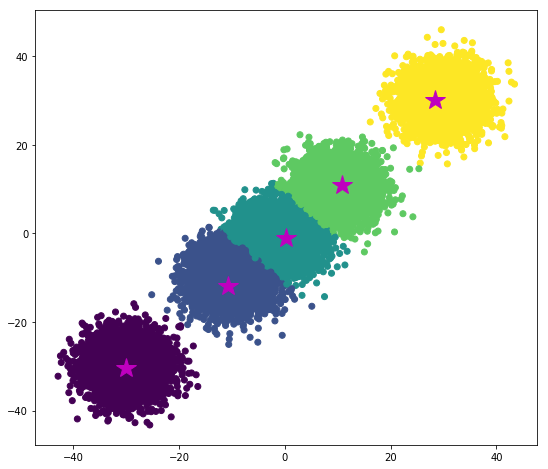

In [124]:
#la taille du figure
plt.figure(figsize=(9,8))
#afficher les points
plt.scatter(df["x"].values, df["y"].values, c=df["cluster"].values)
#afficher les centres sous forme d'étoile
plt.plot(centroids["x"].values,centroids["y"].values,'*m',markersize=20) 
plt.show()

## Commentaires

* Le language utilisé est python pour que notre algorithme pourrait être compréhensible par tous les data scientist malgré qu'avec java, on aurait pu gagner plus de temps d'execution.
Le temps d'exucution de kmeans distribué est beaucoup plus long que celui du kmeans non distribué dans notre cas à cause de : 
    - petit taille du fichier généré
    - cluster sur une seule machine
    - cluster locale

* En utilisant Amazon Elastic Mapreduce (service payant) le résultat serait incomparable avec un fichier de grosse taille
<br>
* To calculate accuracy for the mapreduce , we need to sort the predicted points and sort the original points so that we can compare their classe because reducers does not save the order in parallel compute (accuracy of our algorithm is about 95,23% a little bit less than the single run kmeans because we are using a small file which is not the case for big files)
* pour exécuter le programme sur une autre machine, il faut faut changer les chemins locaux dans multirun.py

* pour exécuter le programme sur hadoop , il suffit d'ajouter hadoop à la ligne de commande d'appel du programme et il faut changer les configuration des arguments dans le main program  et il faut préciser à hadoop quels sonts les mappers et les reducers, c'est simple vu que mrjob supporte hadoop facilement

* pour exécuter sur amazon elastic map reduce il faut ajouter emr à la ligne de commande d'appel du programe 

* si on fait pas appel à hadoop ou à emr comme dans notre cas , mrjob crée son propre cluster distribué dans la machine locale , cette méthode est généralement utilisé pour le test de l'algorithme avant de l'utiliser avec des gros fichiers dans des plateforme payante qui ne tolére pas le fail d'exécution (on paye toujours , c'est le cas de amazon emr) 

* le code dans le rapport est bien commenté (code 50% / commentaires 50% et explication étape par étape)

* le code dans les fichiers source n'est pas bien commenté
